# 앙상블(Ensemble)

- 머신러닝 앙상블이란 여러개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법

 여러모델을 이용하여 데이터를 학습하고 모든 모델의 예측결과를 평균하여 예측

 **앙상블 기법의 종류**

 - 보팅(voting): 투표를 통해 결과 도출

 - 배깅(Bagging): 샘플 중복 생성을 통해 결과 도출

 - 부스팅(Boosting): 이전 오차를 보완하면서 가중치 부여


 - 스태킹(stacking): 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한번예측

 

In [ ]:
# 표 형태 데이터(DataFrame)를 다루기 위한 라이브러리
import pandas as pd
# 숫자 계산을 위한 라이브러리
import numpy as np
# 주피터에서 이미지 출력용 (여기서는 아직 사용 안 함)
from IPython.display import Image

# 넘파이 숫자 출력 시 과학적 표기법(e+00) 사용하지 않도록 설정
np.set_printoptions(suppress=True)

In [ ]:
# OpenML에서 데이터셋을 가져오기 위한 함수
from sklearn.datasets import fetch_openml

# 보스턴 집값 데이터셋 불러오기
# as_frame=True → pandas DataFrame 형태로 받기
data=fetch_openml(name="boston",version=1,as_frame=True)

## 컬럼 소개
### 속성 수 : 13
CRIM: 범죄율

ZN: 25,000 평방 피트 당 주거용 토지의 비율

INDUS: 비소매(non-retail) 비즈니스 면적 비율

CHAS: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)

NOX: 산화 질소 농도 (천만 분의 1)

RM:주거 당 평균 객실 수

AGE: 1940 년 이전에 건축된 자가 소유 점유 비율

DIS: 5 개의 보스턴 고용 센터까지의 가중 거리

RAD: 고속도로 접근성 지수

TAX: 10,000 달러 당 전체 가치 재산 세율

PTRATIO 도시 별 학생-교사 비율

B: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.

LSTAT: 인구의 낮은 지위

MEDV: 자가 주택의 중앙값 (1,000 달러 단위)

In [ ]:
# 입력 데이터(X)를 DataFrame으로 변환
# data['data'] → 입력 변수들
# data['feature_names'] → 컬럼 이름들
df=pd.DataFrame(data['data'],columns=data['feature_names'])

# 정답 값(집값 MEDV)을 새로운 컬럼으로 추가
df['MEDV']=data['target']

# 데이터가 잘 만들어졌는지 위에서 5줄 확인
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### train/test 데이터를 분활한다

In [ ]:
# 데이터 분할 함수 불러오기
from sklearn.model_selection import train_test_split


# -----------------------------------------
# 입력 데이터(X)와 정답(y)을
# 학습용(train)과 테스트용(test)으로 나누기
# -----------------------------------------
x_train,x_test,y_train,y_test=train_test_split(df.drop("MEDV",axis=1),  # 입력 데이터(X): 집값(MEDV) 컬럼 제거
                                               df['MEDV'], # 정답(y): 집값
                                               random_state=42)# 항상 같은 방식으로 섞이도록 고정


In [ ]:
# 학습용 / 테스트용 데이터 크기 확인
x_train.shape,x_test.shape

((379, 13), (127, 13))

In [ ]:
# 학습용 입력 데이터 상위 5개 확인
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
182,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193.0,17.8,394.12,4.82
155,3.53501,0.0,19.58,1,0.8710,6.152,82.6,1.7455,5,403.0,14.7,88.01,15.02
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216.0,14.9,387.31,3.76
126,0.38735,0.0,25.65,0,0.5810,5.613,95.6,1.7572,2,188.0,19.1,359.29,27.26
329,0.06724,0.0,3.24,0,0.4600,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34


In [ ]:
# 학습용 정답(집값) 상위 5개 확인
y_train.head()

182    37.9
155    15.6
280    45.4
126    15.7
329    22.6
Name: MEDV, dtype: float64

### sklearn 평가지표 만들기


**모델별 성능 확인을 위한 함수**

In [ ]:
import matplotlib.pyplot as plt   # 그래프 그리기
from sklearn.metrics import mean_squared_error # MSE 계산 (여기서는 아직 사용 안 함)
import seaborn as sns   # 그래프를 예쁘게 만드는 라이브러리

# 여러 모델의 예측 결과를 저장할 딕셔너리
my_predictions={}


# 여러 그래프에서 사용할 색상 리스트 (확장용)
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
]


# -----------------------------------------
# 예측값과 실제값을 비교해서 시각화하는 함수
# -----------------------------------------
def plot_predictions(name_,pred,actual):

     # 예측값과 실제값을 하나의 DataFrame으로 생성
    df=pd.DataFrame({'prediction':pred,
                     'actual':y_test})# 실제로는 actual을 쓰는 게 더 깔끔함
    
     # 실제값 기준으로 정렬 (그래프를 보기 좋게)
    df=df.sort_values(by='actual').reset_index(drop=True)

    # 그래프 크기 설정
    plt.figure(figsize=(12,9))
    # 예측값 산점도 (빨간 X)
    plt.scatter(df.index,df['prediction'],marker='x',color='r')
    # 실제값 산점도 (검정 동그라미)
    plt.scatter(df.index,df['actual'],alpha=0.7,marker='o',color='black')
    # 그래프 제목
    plt.title(name_,fontsize=15)
    # 범례 표시
    plt.legend(['prediction','actual'],fontsize=12)
     # 그래프 출력
    plt.show()

def mse_eval(name_,pred,actual):
    global my_predictions # 모델별 MSE 저장 딕셔너리
    global colors # 막대그래프 색상 리스트

    # 1️⃣ 예측값 vs 실제값 시각화
    plot_predictions(name_,pred,actual)
    
    # 2️⃣ 평균제곱오차(MSE) 계산
    mse=mean_squared_error(pred,actual)

    # 3️⃣ 모델 이름을 키로 MSE 저장
    my_predictions[name_]=mse

    # 4️⃣ MSE 기준으로 내림차순 정렬
    y_value=sorted(my_predictions.items(),key=lambda x:x[1],reverse=True)


    # 5️⃣ 표(DataFrame)로 변환
    df=pd.DataFrame(y_value,columns=['model','mse'])
    print(df)
    
    # 6️⃣ 그래프 여백 계산
    min_=df['mse'].min()-10

    max_=df['mse'].max()+10

    # 7️⃣ 모델 수에 따라 그래프 크기 조절
    length=len(df)

    plt.figure(figsize=(10,length))

    ax=plt.subplot()

     # y축 위치 및 라벨 설정
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'],fontsize=15)

    # 가로 막대그래프 생성
    bars=ax.barh(np.arange(len(df)),df['mse'])


    # 8️⃣ 막대 색상과 수치 표시
    for i ,v in enumerate(df['mse']):
        idx=np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v+2,i,str(round(v,3)),color='k',fontsize=15,fontweight='bold')

    # 9️⃣ 제목 및 범위 설정
    plt.title('MSE Error',fontsize=18)
    plt.xlim(min_,max_)

    # 10️⃣ 그래프 출력
    plt.show()

def remove_model(name_):
    global my_predictions  # 모델별 MSE 저장 딕셔너리 사용
    try:
        # 모델 이름(key)이 있으면 삭제
        del my_predictions[name_]
    except KeyError:
         # 없는 모델 이름이면 False 반환
        return False
    # 정상적으로 삭제되면 True 반환
    return True

def plot_coef(columns,coef):
    # 피처 이름과 계수를 하나의 표로 묶기
    coef_df=pd.DataFrame(list(zip(columns,coef)))
    # 컬럼 이름 지정
    coef_df.columns=['feature','coef']
     # 계수 크기 기준으로 내림차순 정렬
    coef_df=coef_df.sort_values('coef',ascending=False).reset_index(drop=True)

     # 그래프 생성
    fig,ax=plt.subplots(figsize=(9,7))
    # 가로 막대그래프 (계수 크기)
    ax.barh(np.arange(len(coef_df)),coef_df['coef'])
     # y축 위치 지정
    idx=np.arange(len(coef_df))
    ax.set_yticks(idx)
    # y축 라벨을 피처 이름으로 설정
    ax.set_yticklabels(coef_df['feature'])
     # 여백 자동 조절
    fig.tight_layout()
     # 그래프 출력
    plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# -----------------------------------------
# 데이터 타입을 float으로 통일
# (모델 학습 안정성을 위해)
# -----------------------------------------

x_train=x_train.astype(float)
x_test=x_test.astype(float)

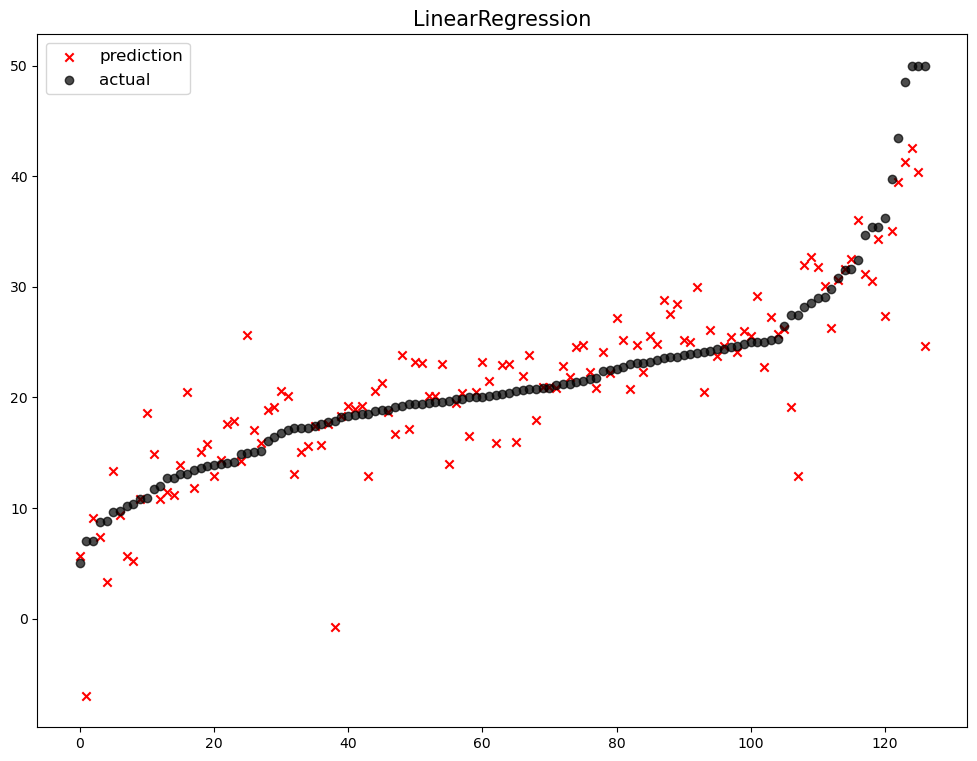

              model        mse
0  LinearRegression  22.098695


In [ ]:
# -----------------------------------------
# 1️⃣ 선형 회귀 모델
# -----------------------------------------

# 선형 회귀 모델 생성
# n_jobs=-1 → CPU 코어 전부 사용
linear_reg=LinearRegression(n_jobs=-1)

# 학습 (공부)
linear_reg.fit(x_train,y_train)

# 테스트 데이터로 예측
pred=linear_reg.predict(x_test)

# 예측 결과 평가 (그래프 + MSE)
mse_eval('LinearRegression',pred,y_test)

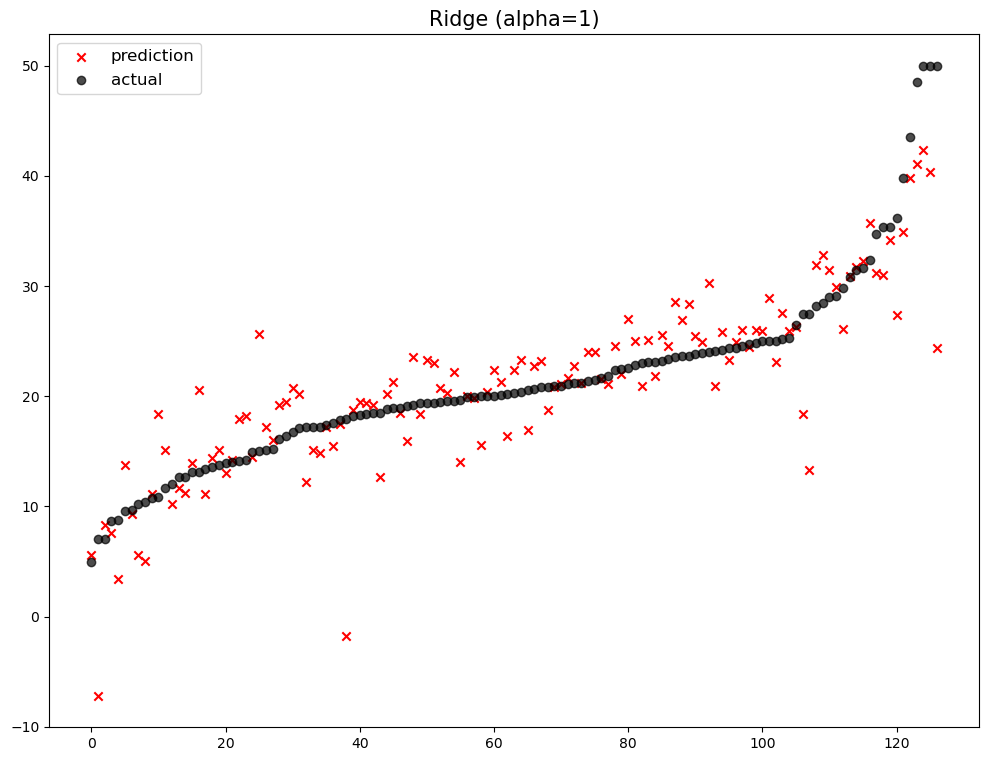

              model        mse
0   Ridge (alpha=1)  22.480476
1  LinearRegression  22.098695


In [ ]:
# -----------------------------------------
# 2️⃣ Ridge 회귀 모델
# -----------------------------------------


# Ridge 모델 생성
# alpha → 규제 강도 (1은 기본값 느낌)
ridge=Ridge(alpha=1)

# 학습
ridge.fit(x_train,y_train)

# 예측
pred=ridge.predict(x_test)

# 평가
mse_eval('Ridge (alpha=1)',pred,y_test)

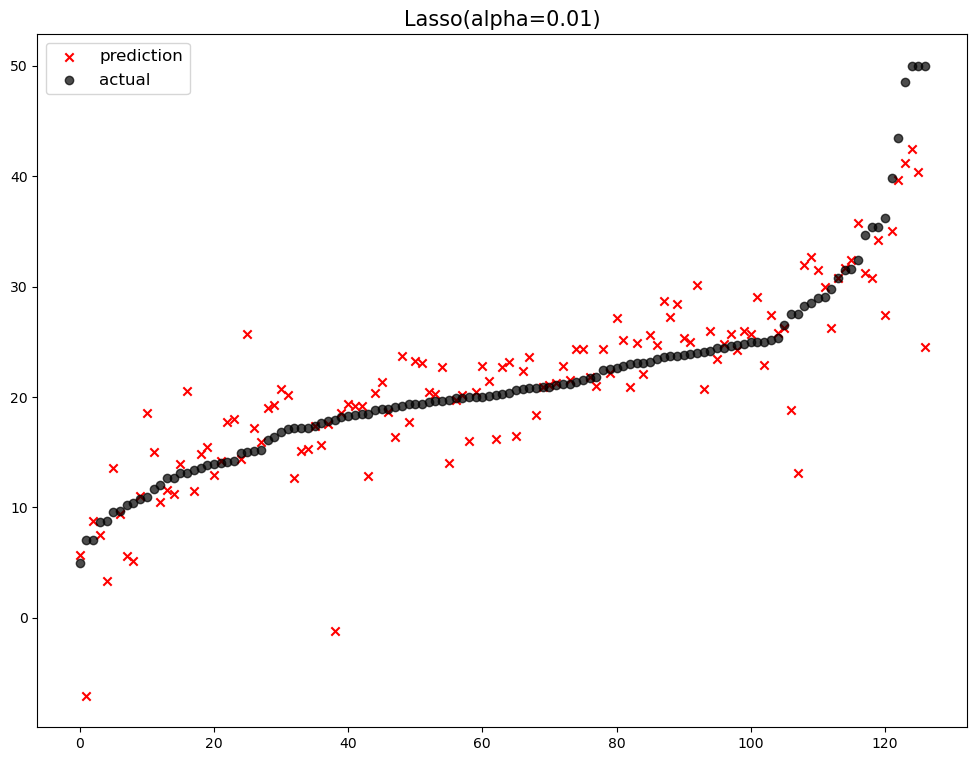

               model        mse
0    Ridge (alpha=1)  22.480476
1  Lasso(alpha=0.01)  22.210557
2   LinearRegression  22.098695


In [ ]:
# -----------------------------------------
# 1️⃣ Lasso 회귀 (L1 규제)
# -----------------------------------------
lasso=Lasso(alpha=0.01) # 규제 강도 0.01
lasso.fit(x_train,y_train) # 학습
pred=lasso.predict(x_test)  # 예측
mse_eval('Lasso(alpha=0.01)',pred,y_test)

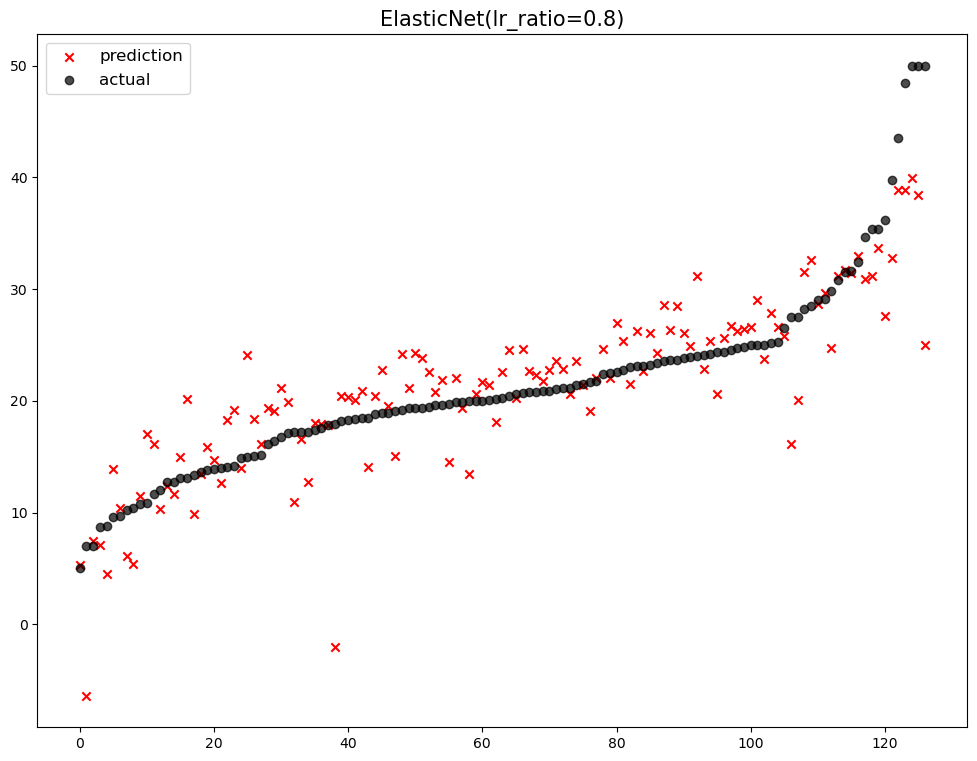

                      model        mse
0  ElasticNet(lr_ratio=0.8)  23.156236
1           Ridge (alpha=1)  22.480476
2         Lasso(alpha=0.01)  22.210557
3          LinearRegression  22.098695


In [ ]:
# -----------------------------------------
# 2️⃣ ElasticNet (L1 + L2)
# -----------------------------------------
elasticnet=ElasticNet(alpha=0.5,l1_ratio=0.8)
elasticnet.fit(x_train,y_train)
pred=elasticnet.predict(x_test)
mse_eval('ElasticNet(lr_ratio=0.8)',pred,y_test)

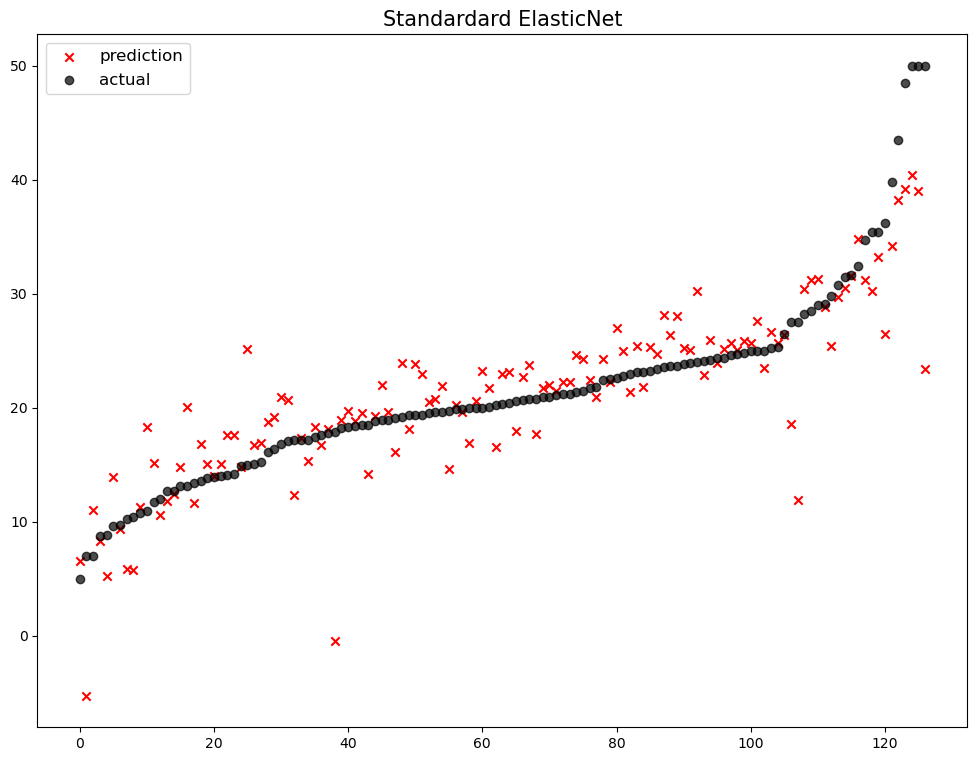

                      model        mse
0  ElasticNet(lr_ratio=0.8)  23.156236
1    Standardard ElasticNet  22.694970
2           Ridge (alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695


In [ ]:
# -----------------------------------------
# 3️⃣ 표준화 + ElasticNet (파이프라인)
# -----------------------------------------
elasticnet_pipeline=make_pipeline(
    StandardScaler(),   # 스케일 맞추기
    ElasticNet(alpha=0.1,l1_ratio=0.2)
)

elasticnet_pred=elasticnet_pipeline.fit(x_train,y_train).predict(x_test)
mse_eval('Standardard ElasticNet',elasticnet_pred,y_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.782e+01, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(


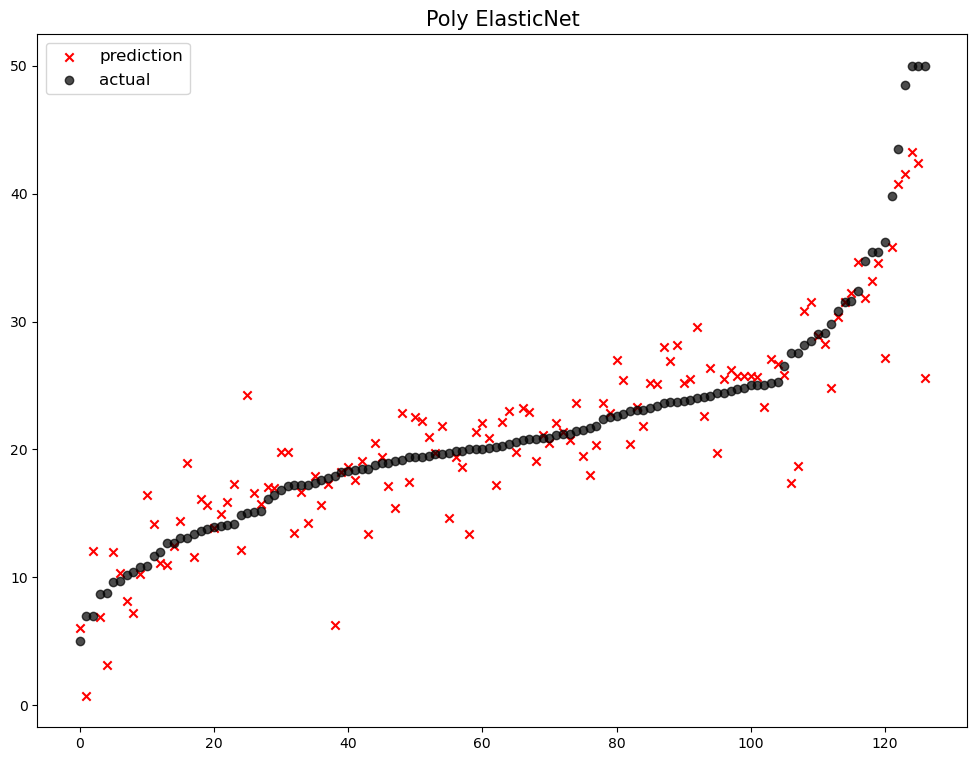

                      model        mse
0  ElasticNet(lr_ratio=0.8)  23.156236
1    Standardard ElasticNet  22.694970
2           Ridge (alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           Poly ElasticNet  15.710492


In [ ]:

# -----------------------------------------
# 4️⃣ 다항식 + 표준화 + ElasticNet
# -----------------------------------------
poly_pipeline=make_pipeline(
    PolynomialFeatures(degree=2,include_bias=False), # 비선형 피처 생성
    StandardScaler(), # 스케일링
    ElasticNet(alpha=0.1,l1_ratio=0.2)
)
poly_pred=poly_pipeline.fit(x_train,y_train).predict(x_test)
mse_eval("Poly ElasticNet",poly_pred,y_test)

## 보팅(Voting)- 회귀(Regression)

voting은 단어 뜻 그대로 투표를 통해 결정하는 방식입니다. Voting은 Bagging과 투표방식이라는 점에서 유사하지만 다음과 같은 큰 차이점이 있습니다.

In [ ]:
# =========================================
# 1️⃣ 보팅 앙상블에 필요한 클래스 불러오기
# =========================================
from sklearn.ensemble import VotingRegressor,VotingClassifier

# =========================================
# 2️⃣ 사용할 개별 모델들을 리스트로 묶기
# =========================================
single_models=[
    ('linear_reg',linear_reg),
    ('ridge',ridge),
    ('lasso',lasso),
    ('elasticnet_pipeline',elasticnet_pipeline),
    ('poly_pipeline',poly_pipeline)
]

In [ ]:
# =========================================
# 3️⃣ VotingRegressor 생성
# =========================================
voting_regressor=VotingRegressor(single_models,n_jobs=-1)

In [ ]:
# =========================================
# 4️⃣ 보팅 앙상블 모델 학습
# =========================================
voting_regressor.fit(x_train,y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))]))],
                n_jobs=-1)

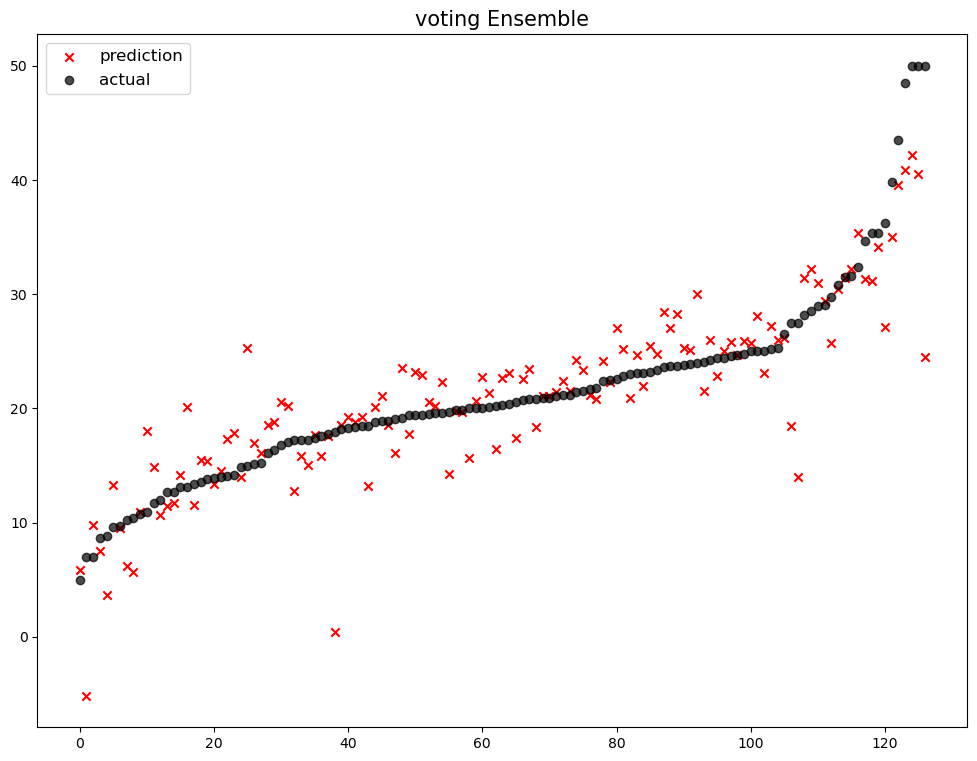

                      model        mse
0  ElasticNet(lr_ratio=0.8)  23.156236
1    Standardard ElasticNet  22.694970
2           Ridge (alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           voting Ensemble  20.474757
6           Poly ElasticNet  15.710492


In [ ]:
# =========================================
# 5️⃣ 테스트 데이터로 예측
# =========================================
voting_pred=voting_regressor.predict(x_test)


# =========================================
# 6️⃣ 성능 평가 (MSE)
# =========================================
mse_eval('voting Ensemble',voting_pred,y_test)

## 보팅 (Voting) - 분류 (Classification)
분류기 모델을 만들때 Voting 앙상블은 1가지의 중요한 parameter가 있습니다

- voting={'hard','soft'}

#### hard로 설정한 경우
class를 0,1로 분류 예측을 하는 이진분류를 예로 들어 보겠습니다

Hard Voting 방식에서는 결과 값에 대한 다수 class를 차용합니다.

classification을 예로 들어 보자면, 분류를 예측한 값이 1, 0, 0, 1, 1 이었다고 가정한다면 1이 3표, 0이 2표를 받았기 때문에 Hard Voting 방식

에서는 1이 최종 값으로 예측을 하게 됩니다.

#### soft
soft vote 방식은 각각의 확률의 평균 값을 계산한다음에 가장 확률이 높은 값으로 확정짓게 됩니다.

가령 class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이었고, class 1이 나올 확률이 (0.6, 0.1, 0.1, 0.6, 0.6) 이었다면,
class 0이 나올 최종 확률은 (0.4+0.9+0.9+0.4+0.4) / 5 = 0.44,

class 1이 나올 최종 확률은 (0.6+0.1+0.1+0.6+0.6) / 5 = 0.4

가 되기 때문에 앞선 Hard Vote의 결과와는 다른 결과 값이 최종 으로 선출되게 됩니다.

In [ ]:
# =========================================
# 1️⃣ 보팅 분류기와 사용할 모델 불러오기
# =========================================
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier


# =========================================
# 2️⃣ 사용할 개별 분류 모델들을 리스트로 묶기
# =========================================
models=[
    ('Logi',LogisticRegression()),
    ('ridge',RidgeClassifier())
]

# =========================================
# 3️⃣ VotingClassifier 생성 (하드 보팅)
# =========================================
vc=VotingClassifier(models,voting='hard')

## 배깅(Bagging)

Bagging은 Bootstrap Aggregating의 줄임말입니다.
Bootstrap = Sample(샘플) + Aggregating = 합산
Bootstrap은 여러 개의 dataset을 중첩을 허용하게 하여 샘플링하여 분할하는 방식
데이터 셋의 구성이 [1, 2, 3, 4, 5 ]로 되어 있다면,
1. group 1 = [1, 2, 3]
2. group 2 = [1, 3, 4]
3. group 3 = [2, 3, 5]

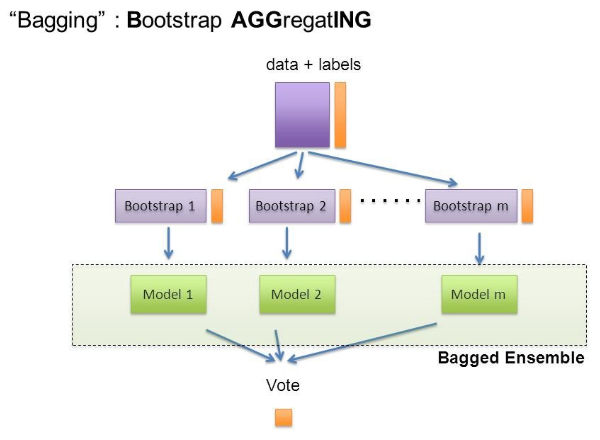

In [26]:
Image('https://teddylee777.github.io/images/2019-12-17/image-20191217015537872.png')

## Voting VS Bagging
Voting은 여러 알고리즘의 조합에 대한 앙상블

Bagging은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블

대표적인 Bagging 앙상블

1. RandomForest

2. Bagging

In [27]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

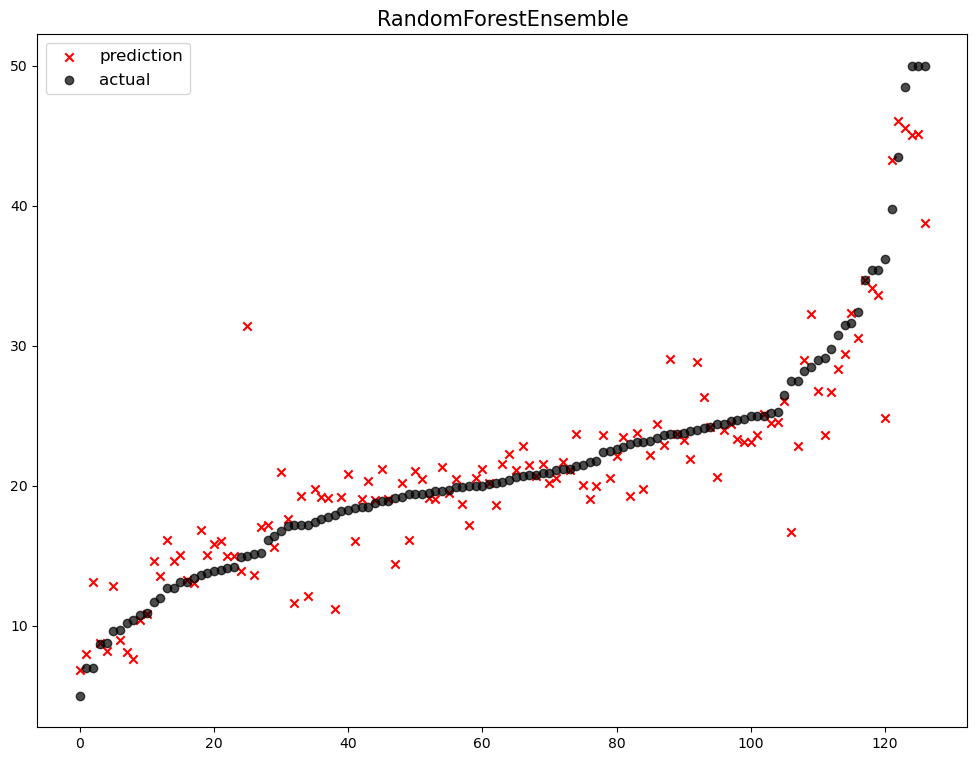

                      model        mse
0  ElasticNet(lr_ratio=0.8)  23.156236
1    Standardard ElasticNet  22.694970
2           Ridge (alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           voting Ensemble  20.474757
6           Poly ElasticNet  15.710492
7      RandomForestEnsemble  10.249460


In [28]:
rfr_pred=rfr.predict(x_test)
mse_eval('RandomForestEnsemble',rfr_pred,y_test)

n_jobs: CPU 사용 갯수

max_depth: 깊어질 수 있는 최대 깊이. 과대적합 방지용

n_estimators: 앙상블하는 트리의 갯수

max_features: 최대로 사용할 feature의 갯수. 과대적합 방지용

min_samples_split: 트리가 분할할 때 최소 샘플의 갯수. default=2. 과대적합 방지용

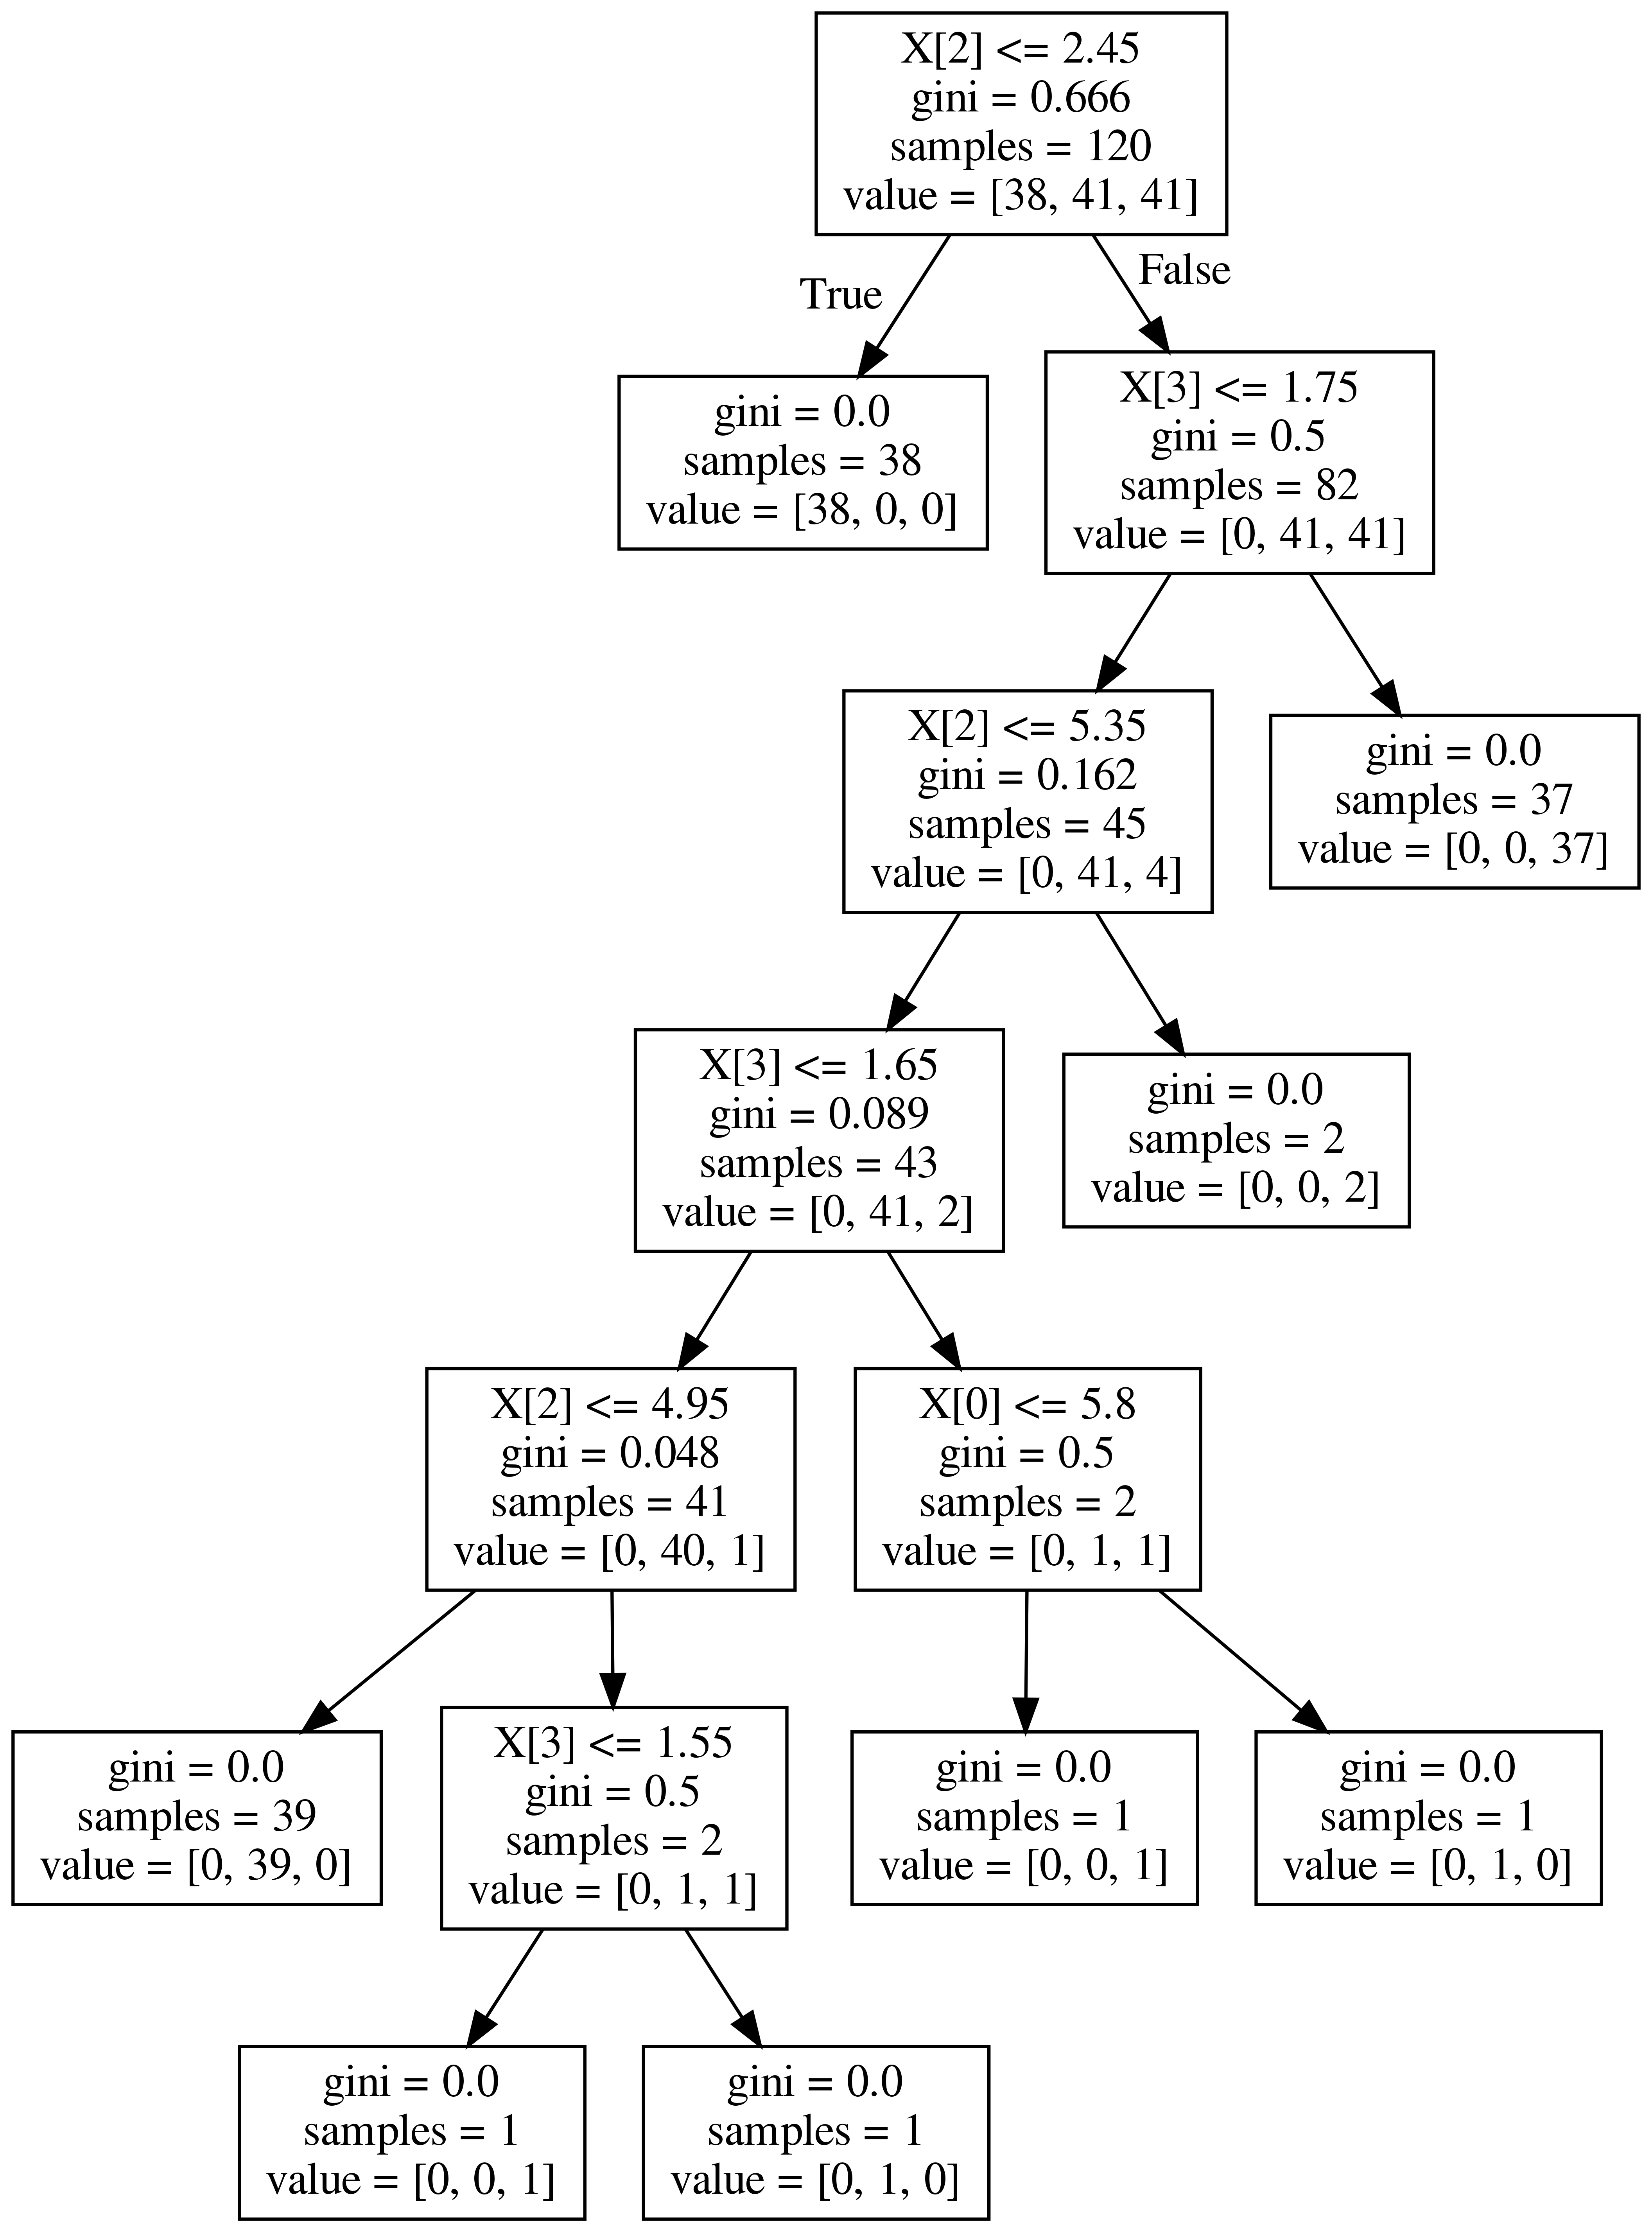

In [29]:
Image('https://teddylee777.github.io/images/2020-01-09/decistion-tree.png', width=600)

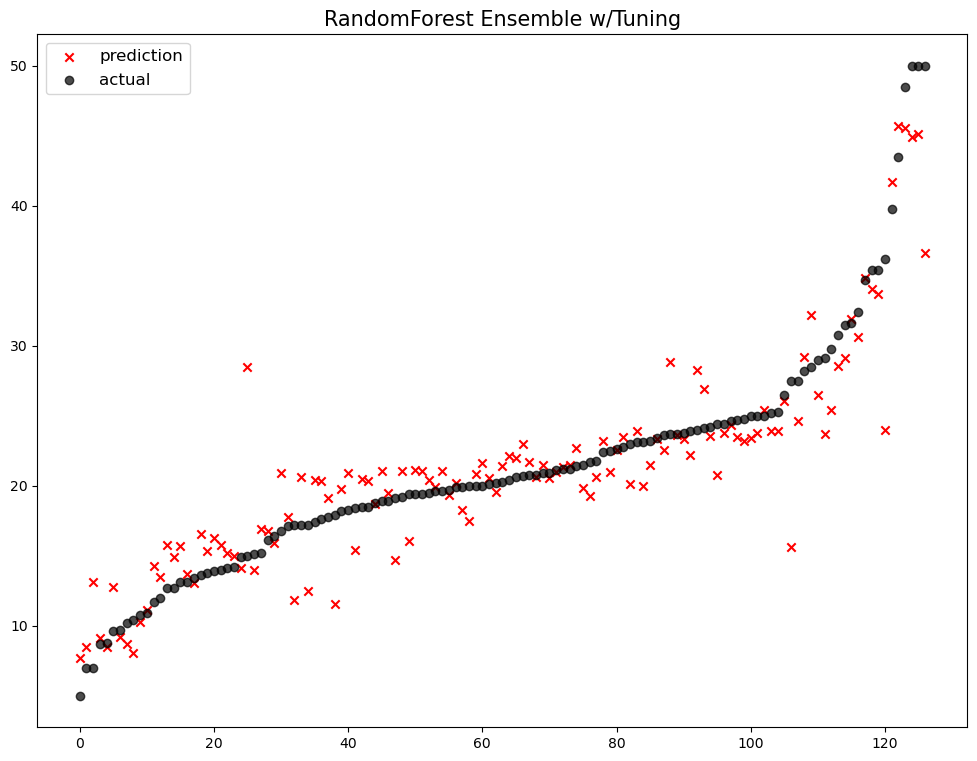

                            model        mse
0        ElasticNet(lr_ratio=0.8)  23.156236
1          Standardard ElasticNet  22.694970
2                 Ridge (alpha=1)  22.480476
3               Lasso(alpha=0.01)  22.210557
4                LinearRegression  22.098695
5                 voting Ensemble  20.474757
6                 Poly ElasticNet  15.710492
7            RandomForestEnsemble  10.249460
8  RandomForest Ensemble w/Tuning  10.196040


In [30]:
rfr=RandomForestRegressor(random_state=42,n_estimators=1000,max_depth=7,max_features=0.9)
rfr.fit(x_train,y_train)

rfr_pred=rfr.predict(x_test)

mse_eval('RandomForest Ensemble w/Tuning',rfr_pred,y_test)

약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식입니다.
장점

성능이 매우 우수하다 (Lgbm, XGBoost)

### 단점
부스팅 알고리즘의 특성상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에 잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감할
수 있다
다른 앙상블 대비 학습 시간이 오래걸린다는 단점이 존재

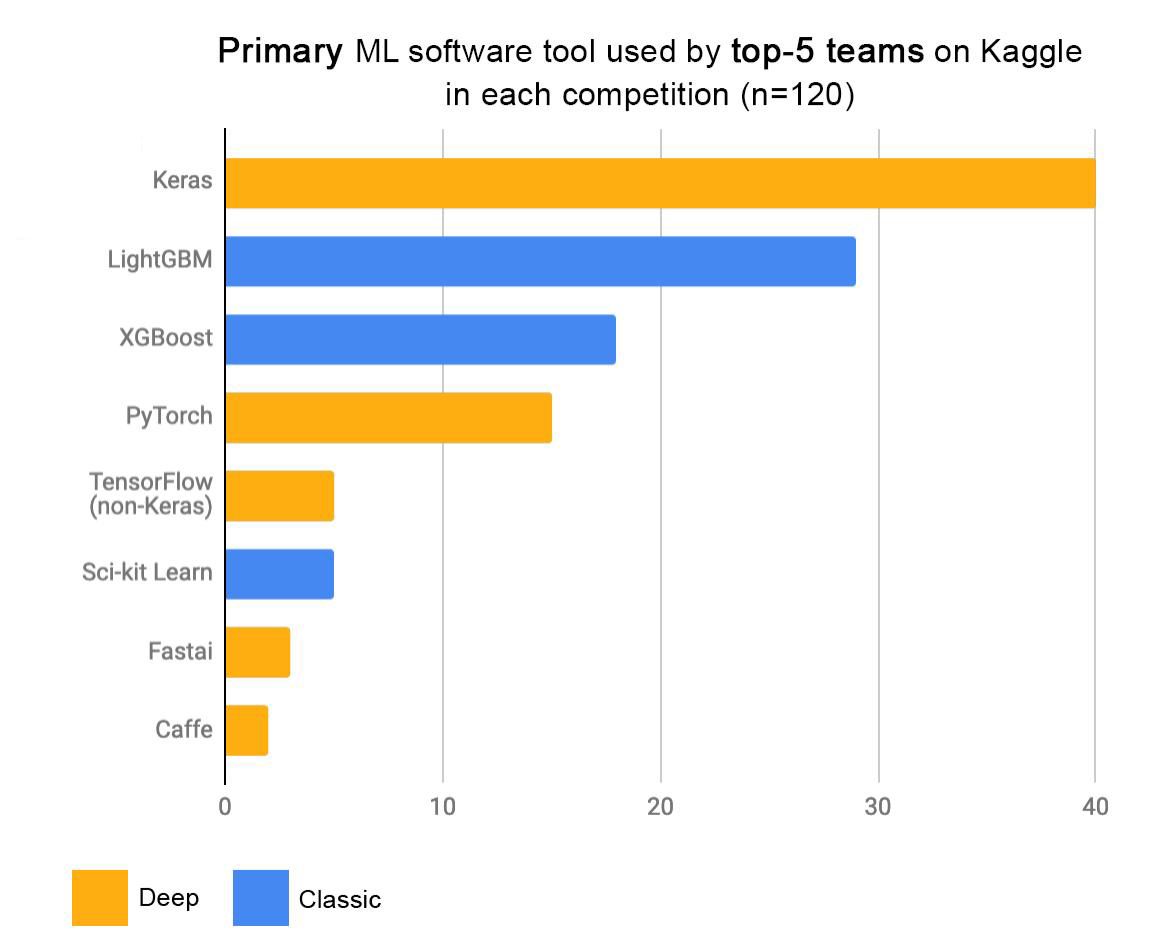

In [31]:
Image('https://keras.io/img/graph-kaggle-1.jpeg', width=800)

## GradientBoost

성능이 우수함

학습시간이 해도해도 너무 느리다

1. AdaBoost

2. GradientBoost

3. LightGBM (LGBM)

4. XGBoost

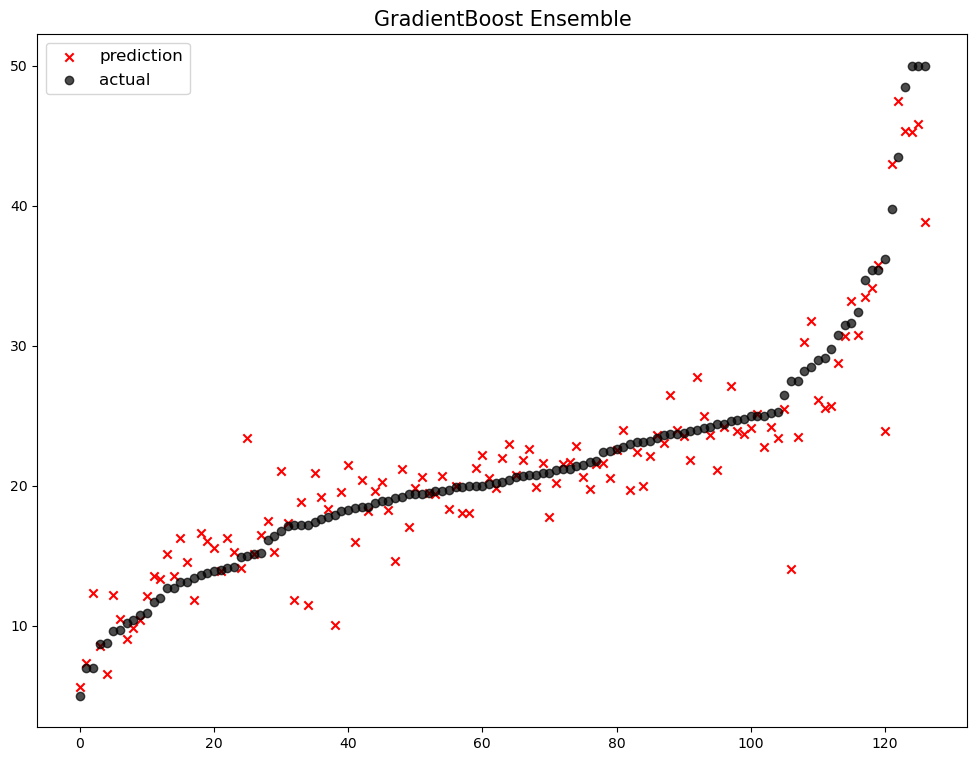

                            model        mse
0        ElasticNet(lr_ratio=0.8)  23.156236
1          Standardard ElasticNet  22.694970
2                 Ridge (alpha=1)  22.480476
3               Lasso(alpha=0.01)  22.210557
4                LinearRegression  22.098695
5                 voting Ensemble  20.474757
6                 Poly ElasticNet  15.710492
7            RandomForestEnsemble  10.249460
8  RandomForest Ensemble w/Tuning  10.196040
9          GradientBoost Ensemble   8.956141


In [32]:
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(x_train,y_train)
gbr_pred=gbr.predict(x_test)
mse_eval('GradientBoost Ensemble',gbr_pred,y_test)